In [ ]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install xgboost -i https://pypi.mirrors.ustc.edu.cn/simple/

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3440 sha256=d71e51e6daeef79970472e8a147ebbde3a9d1bf3affa869be4da40da0c3dded0
  Stored in directory: /root/.cache/pip/wheels/94/66/fa/f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3248 sha256=d97dc103b42c844f86046838ea2315ad443f086765d380ac628aa4c7b256522b
  Stored in directory: /root/.cache/pip/wheels/2a/70/02/2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# used to plot geographical heatmap
import folium
from folium.plugins import HeatMap
import plotly.express as px 

# convert country name to country code in ISO3 format
import country_converter as coco

from google.colab import data_table
data_table.enable_dataframe_formatter()

# for month sort
import sort_dataframeby_monthorweek as sd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score as cvs,KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
# helper functions
def get_matched_columns(data1, data2, data3):
  cols = []
  for c1 in data1.columns:
    if c1 in data2.columns and c1 in data3.columns:
      cols.append(c1)
  return cols

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)


# Load Data

In [ ]:
# main data - hotel booking demand data
data = pd.read_csv("/content/hotel_bookings.csv")
print(data.shape)
data.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# world happiness data
happy2015 = pd.read_csv("/content/2015.csv")
happy2016 = pd.read_csv("/content/2016.csv")
happy2017 = pd.read_csv("/content/2017.csv")
display(happy2015)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
# world gdp data
gdp = pd.read_csv("/content/countries_gdp_hist.csv", sep=';')
gdp.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,0.0
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.0,0.0,0.0
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.0,0.0,0.0


# Combine Dataset

In [ ]:
print(happy2015.columns, "\n\n", happy2016.columns, "\n\n", happy2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [ ]:
# rename happy2017 columns name
happy2017 = happy2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 
                  'Whisker.high': 'Whisker high','Whisker.low': 'Whisker low', 
                  'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 
                  'Health..Life.Expectancy.': 'Health (Life Expectancy)', 
                  'Trust..Government.Corruption.': 'Trust (Government Corruption)', 
                  'Dystopia.Residual': 'Dystopia Residual'})
happy2017

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [ ]:
# add year columns to each dataset
happy2015["Year"] = 2015 * np.ones_like(happy2015.shape[0])
happy2016["Year"] = 2016 * np.ones_like(happy2016.shape[0])
happy2017["Year"] = 2017 * np.ones_like(happy2017.shape[0])

In [ ]:
happy2017["Year"]

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
150    2017
151    2017
152    2017
153    2017
154    2017
Name: Year, Length: 155, dtype: int64

In [ ]:
happy2016["Year"]

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
152    2016
153    2016
154    2016
155    2016
156    2016
Name: Year, Length: 157, dtype: int64

In [ ]:
happy2015["Year"]

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
153    2015
154    2015
155    2015
156    2015
157    2015
Name: Year, Length: 158, dtype: int64

In [ ]:
# concatenate three years data into one
matched_cols = get_matched_columns(happy2015, happy2016, happy2017)
matched_cols

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Year']

In [ ]:
# concatenate three year's data into one using matching columns
happy = pd.concat([happy2015[matched_cols], happy2016[matched_cols], happy2017[matched_cols]])
happy

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017


In [ ]:
# filter out 2015 - 2017 gdp data
gdp = gdp[(gdp["year"] == 2015) | (gdp["year"] == 2016) | (gdp["year"] == 2017)]
gdp

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
55,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,2015,2.963128e+09,2963.128492,3.543630
56,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,2016,2.983799e+09,2983.798883,2.116716
57,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,2017,3.092179e+09,3092.178771,5.482371
117,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo,2015,1.999816e+10,19998.156214,1.451315
118,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo,2016,1.801956e+10,18019.558182,2.260314
...,...,...,...,...,...,...,...,...,...,...
13262,ZMB,Africa,Sub-Saharan Africa,Eastern Africa,Zambia,Países de ingreso bajo,2016,2.095841e+10,20958.412538,3.776679
13263,ZMB,Africa,Sub-Saharan Africa,Eastern Africa,Zambia,Países de ingreso bajo,2017,2.587360e+10,25873.601261,3.504336
13323,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2015,1.996312e+10,19963.120610,2.023650
13324,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2016,2.054868e+10,20548.678070,0.900955


In [ ]:
# combine gdp data with country happniess data by country name and year; then convert the column names into all lowercase
gdp_happiness = gdp.merge(happy, how='inner', left_on=['country_name', "year"], right_on=["Country", "Year"]).drop(columns = ["Year", "Country"])
gdp_happiness.columns = gdp_happiness.columns.str.lower()
gdp_happiness = gdp_happiness.rename(columns={"country_code": "country"})
gdp_happiness.head()

,country,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation,happiness rank,happiness score,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo,2015,1.999816e+10,19998.156214,1.451315,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo,2016,1.801956e+10,18019.558182,2.260314,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo,2017,1.889635e+10,18896.352022,2.647003,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,AGO,Africa,Sub-Saharan Africa,Middle Africa,Angola,Países de ingreso mediano bajo,2015,8.721930e+10,87219.300385,0.940000,137,4.033,0.757780,0.860400,0.166830,0.10384,0.071220,0.123440,1.949390
4,AGO,Africa,Sub-Saharan Africa,Middle Africa,Angola,Países de ingreso mediano bajo,2016,4.984049e+10,49840.491178,-2.580000,141,3.866,0.847310,0.663660,0.049910,0.00589,0.084340,0.120710,2.094590


In [ ]:
# merge gdp_happiness data with hotel booking demand data; this is the data we are going to use
data = data.merge(gdp_happiness, how="inner", left_on=["country", 'arrival_date_year'], right_on=["country", "year"]).drop(columns=["year"])
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,gdp_variation,happiness rank,happiness score,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.792046,88,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.792046,88,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,1.792046,88,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,1.792046,88,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,1.792046,88,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462


In [ ]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'region_name',
       'sub_region_name', 'intermediate_region', 'country_name',
       'income_group', 'total_gdp', 'total_gdp_million', 'gdp_variation',
       'happiness rank', 'happiness score', 'economy (gdp per capita)',
       'family', 'health (life expectancy)', 'freedom',
       'trust (governme

# Data Visualization

## Numerical Columns Correlation

<ipython-input-22-7ab05b095ea3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

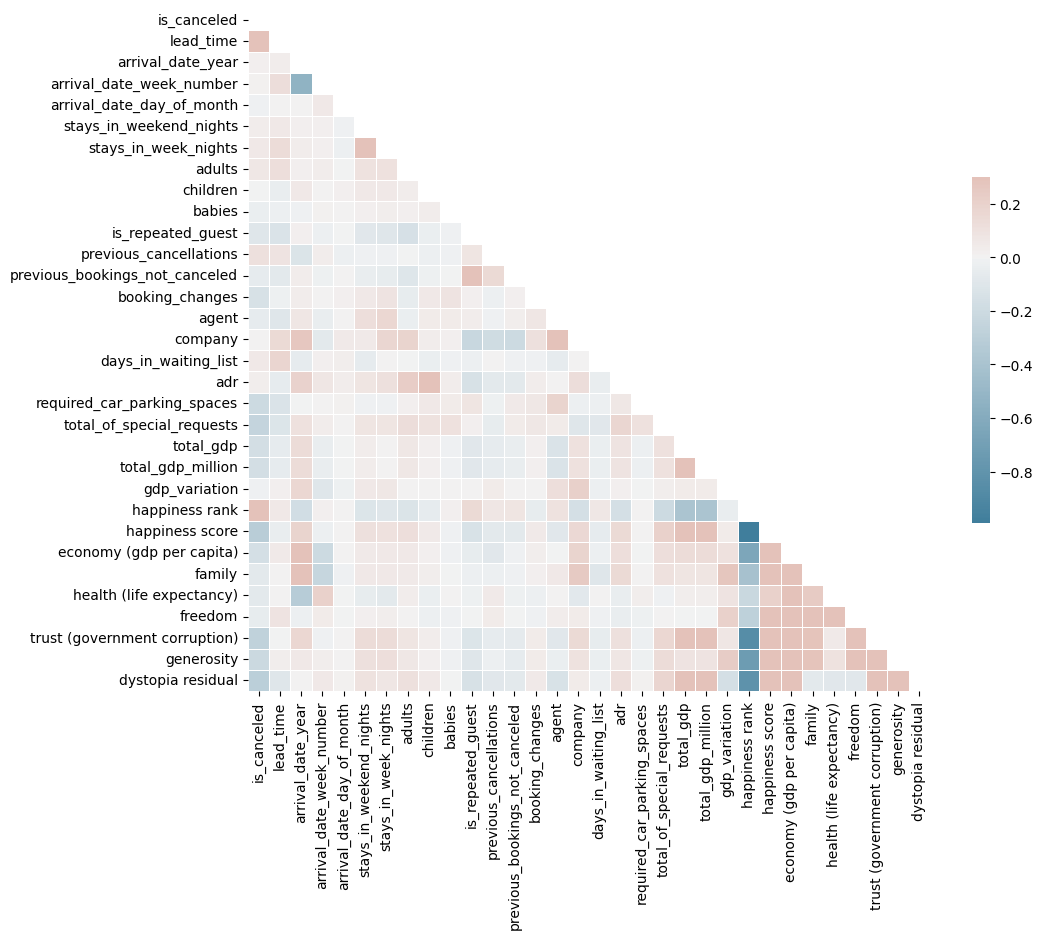

In [ ]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Categorical Data Distribution

In [ ]:
cat_cols = ["hotel", "is_canceled", "arrival_date_year", "arrival_date_month", \
            "meal", "market_segment", "distribution_channel", "reserved_room_type", \
            "assigned_room_type", "deposit_type", "reservation_status"]

hotel


City Hotel      70753
Resort Hotel    31281
Name: hotel, dtype: int64



is_canceled


0    61577
1    40457
Name: is_canceled, dtype: int64



arrival_date_year


2016    48749
2017    33268
2015    20017
Name: arrival_date_year, dtype: int64



arrival_date_month


August       12007
July         10581
May           9667
April         9543
October       9412
June          9010
September     8847
March         8390
February      7038
December      6199
November      6054
January       5286
Name: arrival_date_month, dtype: int64



meal


BB           79226
HB           12553
SC            8351
Undefined     1135
FB             769
Name: meal, dtype: int64



market_segment


Online TA        46728
Offline TA/TO    20536
Groups           17922
Direct           11006
Corporate         4897
Complementary      711
Aviation           232
Undefined            2
Name: market_segment, dtype: int64



distribution_channel


TA/TO        83479
Direct       12637
Corporate     5768
GDS            145
Undefined        5
Name: distribution_channel, dtype: int64



reserved_room_type


A    75454
D    15309
E     4990
F     2349
G     1648
B      980
C      792
H      504
L        6
P        2
Name: reserved_room_type, dtype: int64



assigned_room_type


A    65175
D    20822
E     6028
F     3001
G     2045
B     1919
C     1910
H      593
I      287
K      251
P        2
L        1
Name: assigned_room_type, dtype: int64



deposit_type


No Deposit    87532
Non Refund    14419
Refundable       83
Name: deposit_type, dtype: int64



reservation_status


Check-Out    61577
Canceled     39348
No-Show       1109
Name: reservation_status, dtype: int64

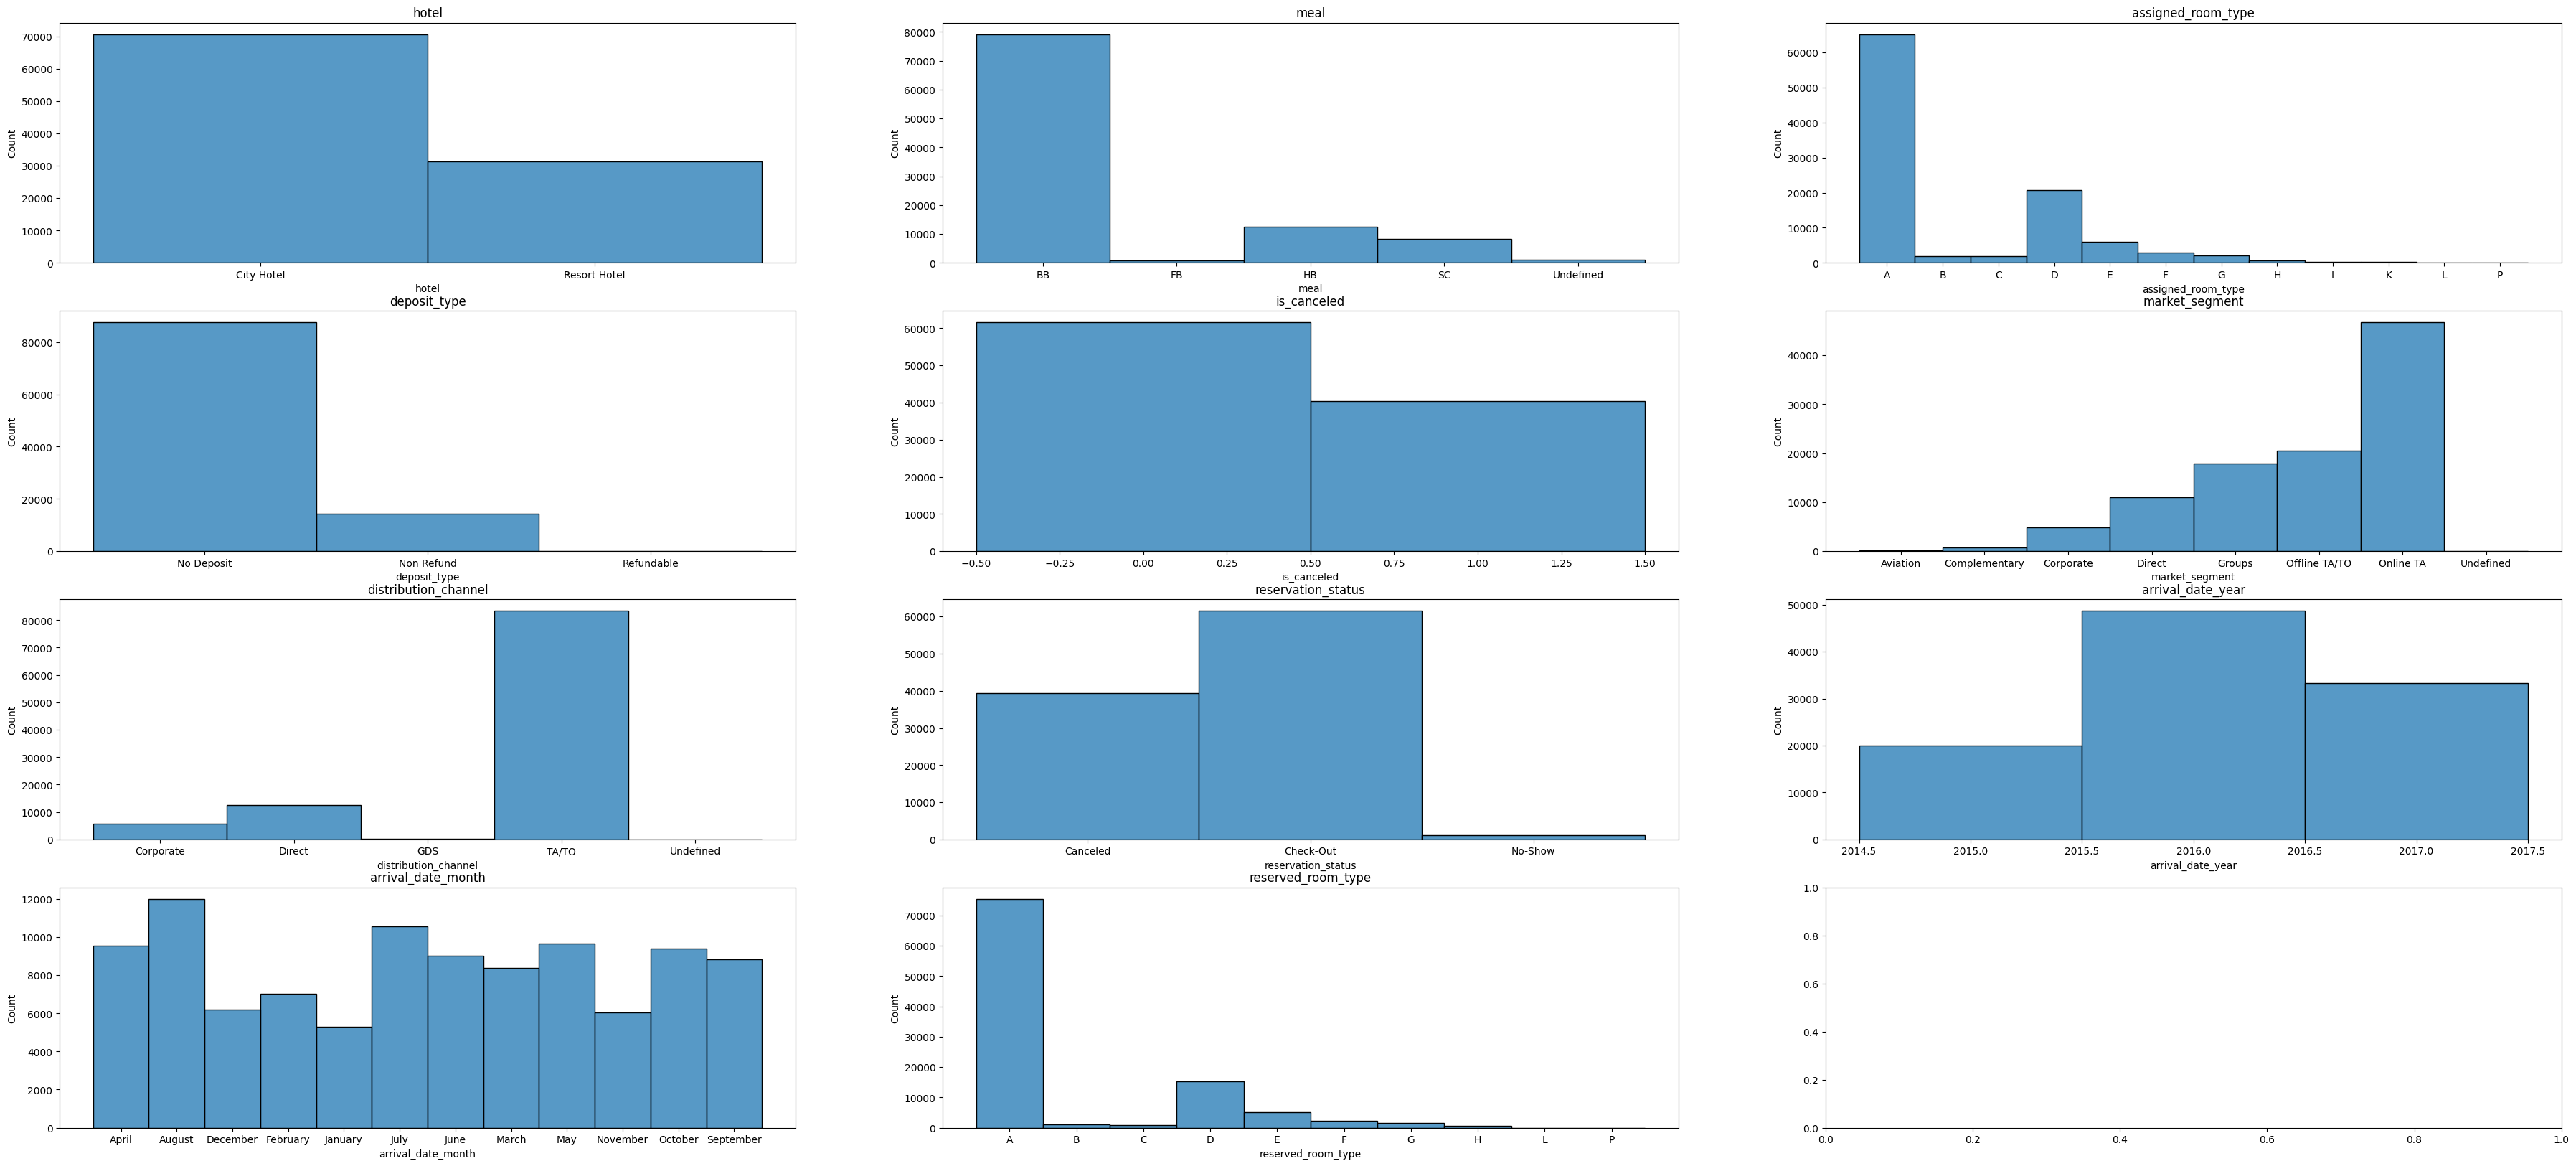

In [ ]:
plots = []
i = -1
j = -1
fig, axes = plt.subplots(4, 3, figsize=(45, 20))
for col in cat_cols:
  print(col)
  if data[col].dtype != "category":
    data[col] = data[col].astype('category')
  display(data[col].value_counts())
  i = (i + 1) % 4
  j = (j + 1) % 3
  sns.histplot(ax=axes[i, j], data=data, x=col)
  axes[i, j].set_title(col)
  print()
  print()

## Geographical Distribution

In [ ]:
country_guests = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests.columns = ['country', 'No of guests']
country_guests

,country,No of guests
0,PRT,21071
1,FRA,8481
2,ESP,6391
3,DEU,6069
4,IRL,2543
...,...,...
112,ZMB,1
113,NPL,1
114,MDG,1
115,COM,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_guests, locations = country_guests['country'],
                           color = country_guests['No of guests'], hover_name = country_guests['country'])
guests_map.show()

We can see most of the guests are coming from Portugal and UK. 

In [ ]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

## Customer Type Distribution(separated by hotel)

In [ ]:
customer_type_resort = resort["customer_type"].value_counts().reset_index()
customer_type_resort.columns = ["customer type", "count"]

customer_type_city = city["customer_type"].value_counts().reset_index()
customer_type_city.columns = ["customer type", "count"]

customer_type_count = customer_type_resort.merge(customer_type_city, on="customer type")
customer_type_count.columns = ["customer type", "resort hotel", "city hotel"]
customer_type_count = customer_type_count.set_index("customer type")
customer_type_count

,resort hotel,city hotel
customer type,,
Transient,16417,27529
Transient-Party,4420,11425
Contract,333,1053
Group,183,217


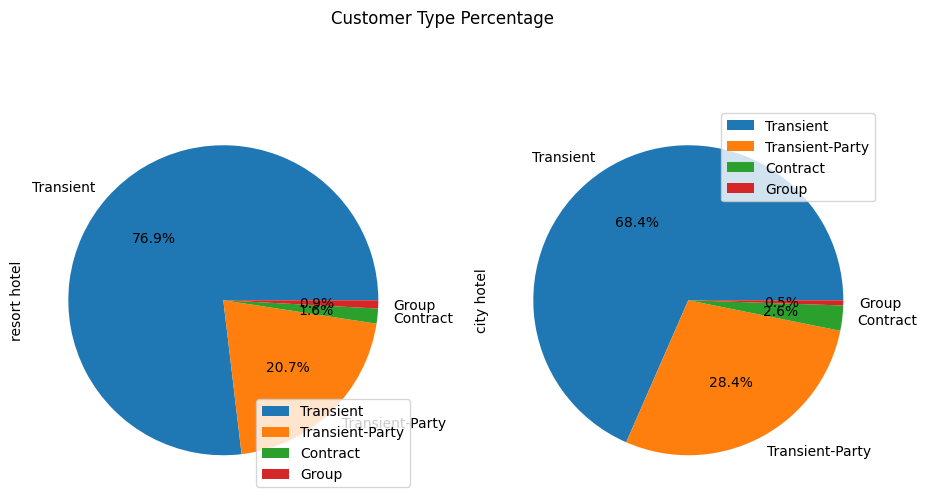

In [ ]:
#create pie chart
customer_type_count.plot.pie(subplots=True, figsize=(11,6), autopct='%1.1f%%', title="Customer Type Percentage")
plt.show()

## How Hotel Price Varied by Month?

In [ ]:
resort[["arrival_date_month", "adr"]].groupby(by="arrival_date_month").mean().reset_index().sort_values(by="adr")

,arrival_date_month,adr
9,November,48.544524
4,January,49.003522
3,February,55.079693
7,March,57.601876
10,October,63.239974
2,December,70.211950
0,April,78.747025
8,May,79.026040
11,September,103.384915
6,June,115.119071


In [ ]:
city[["arrival_date_month", "adr"]].groupby(by="arrival_date_month").mean().reset_index().sort_values(by="adr")

,arrival_date_month,adr
4,January,82.242384
9,November,85.750790
3,February,86.153345
2,December,87.250883
7,March,90.133977
10,October,100.664085
0,April,111.018525
11,September,111.120484
5,July,115.306222
6,June,117.169528


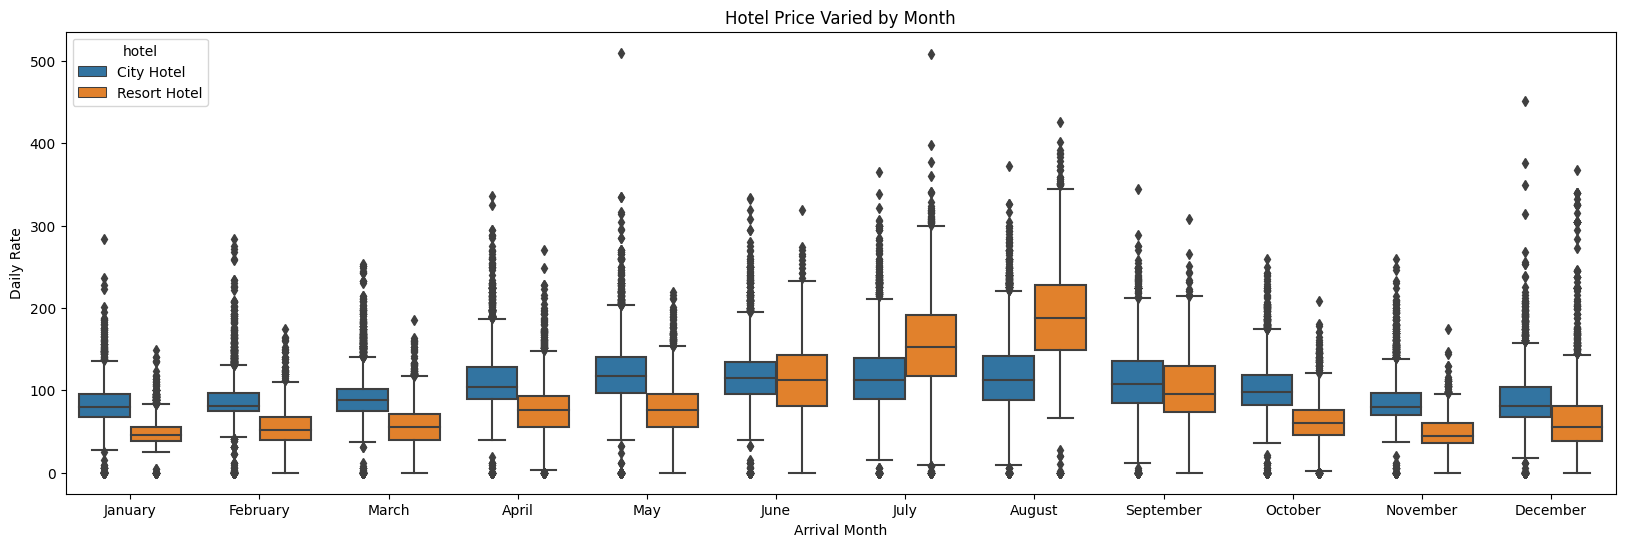

In [ ]:
ordered_months = ['January', "February","March","April", "May", "June","July","August","September", "October", "November", "December"]
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data[(data["is_canceled"] == 0)], x="arrival_date_month", y="adr", hue="hotel", order=ordered_months)
ax.set_title("Hotel Price Varied by Month")
ax.set(xlabel = "Arrival Month", ylabel="Daily Rate")
plt.show()

## How Hotel Price Varied by Year?

In [ ]:
resort[["arrival_date_year", "adr"]].groupby(by="arrival_date_year").mean().reset_index()

,arrival_date_year,adr
0,2015,93.342410
1,2016,86.728603
2,2017,105.862854


In [ ]:
city[["arrival_date_year", "adr"]].groupby(by="arrival_date_year").mean().reset_index()

,arrival_date_year,adr
0,2015,86.880536
1,2016,103.564534
2,2017,116.398749


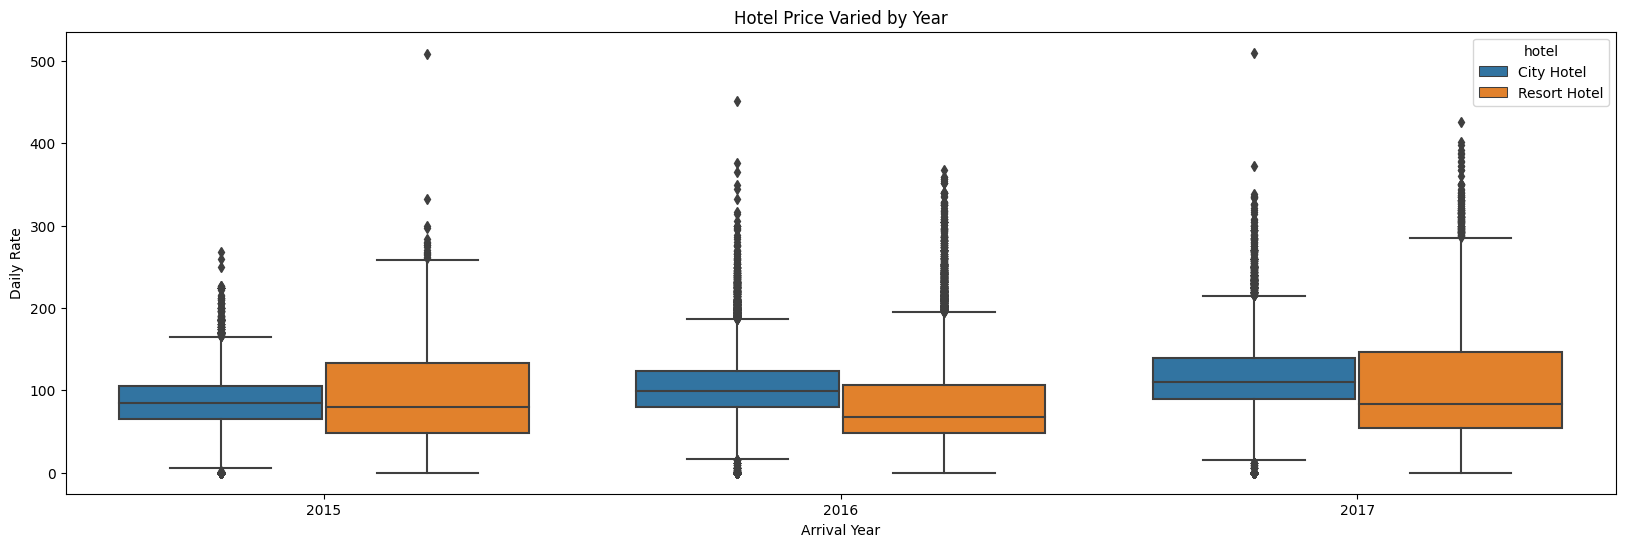

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data[(data["is_canceled"] == 0)], x="arrival_date_year", y="adr", hue="hotel")
ax.set_title("Hotel Price Varied by Year")
ax.set(xlabel = "Arrival Year", ylabel="Daily Rate")
plt.show()

## How Cancellation Action varied by Month?

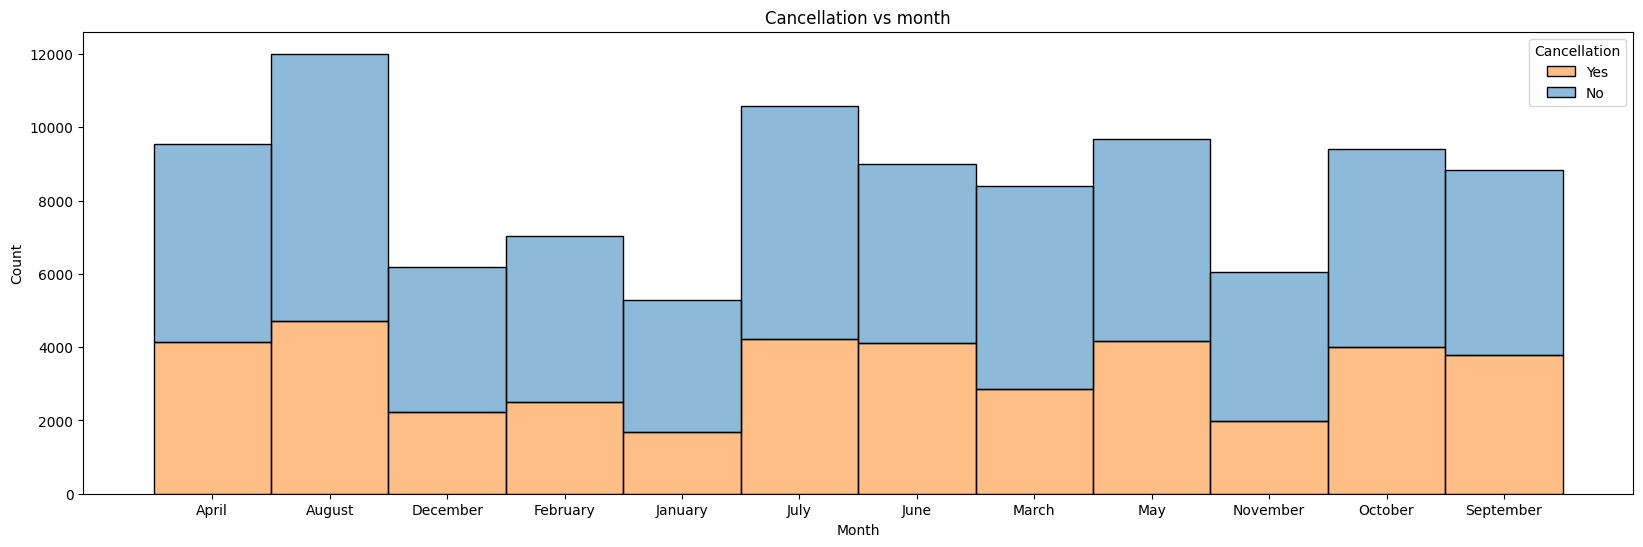

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(data, x="arrival_date_month", hue="is_canceled", alpha=0.5, multiple="stack")
ax.set_title("Cancellation vs month")
ax.set(xlabel="Month")
plt.legend(title="Cancellation", labels=["Yes", "No"])
plt.show()

In [ ]:
data_table.disable_dataframe_formatter()
cancellation_rate_by_month = data[["is_canceled", "arrival_date_month"]].groupby(by="arrival_date_month").apply(lambda x: sum(x["is_canceled"]) / len(x["is_canceled"])).sort_values(ascending=False).reset_index().rename(columns={0: "cancellation_rate"})
cancellation_rate_by_month

,arrival_date_month,cancellation_rate
0,June,0.456049
1,April,0.433407
2,May,0.431261
3,September,0.428394
4,October,0.426371
5,July,0.400151
6,August,0.393437
7,December,0.360219
8,February,0.355783
9,March,0.340763


Cancellation percentage roughly stays unchanged among the whole year(30-40%), while April and June are the two months that most cancellation actions likely occurs, and January and November are two months when people don't usually cancel the reservation. 

In [ ]:
cancellation_rate_by_month = sort_month(cancellation_rate_by_month,'arrival_date_month')
cancellation_rate_by_month

,arrival_date_month,cancellation_rate
0,January,0.319334
1,February,0.355783
2,March,0.340763
3,April,0.433407
4,May,0.431261
5,June,0.456049
6,July,0.400151
7,August,0.393437
8,September,0.428394
9,October,0.426371


In [ ]:
px.line(cancellation_rate_by_month, x = 'arrival_date_month', y = ['cancellation_rate'],
        title='Cancellation rate varies by month', template = 'plotly_dark')

Cancellation percentage roughly stays unchanged among the whole year(30-40%), while April and June are the two months that most cancellation actions likely occurs, and January and November are two months when people don't usually cancel the reservation.

## How Cancellation Action varied based on GDP

In [ ]:
data_table.disable_dataframe_formatter()
cancellation_rate_by_GDP = data[["is_canceled", "total_gdp"]].groupby(by="total_gdp").apply(lambda x: sum(x["is_canceled"]) / len(x["is_canceled"])).sort_values(ascending=False).reset_index().rename(columns={0: "cancellation_rate"})
cancellation_rate_by_GDP

,total_gdp,cancellation_rate
0,2.001675e+10,1.0
1,2.171762e+10,1.0
2,1.492949e+10,1.0
3,1.270166e+10,1.0
4,1.182107e+10,1.0
...,...,...
286,1.480899e+10,0.0
287,1.495395e+10,0.0
288,9.437625e+10,0.0
289,9.929038e+10,0.0


<Axes: xlabel='total_gdp', ylabel='cancellation_rate'>

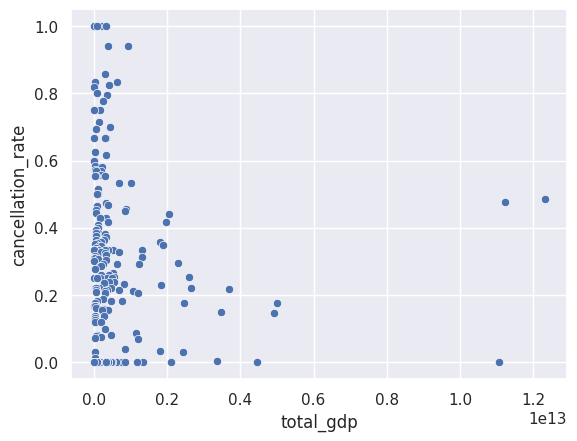

In [ ]:
sns.set(color_codes=True)
sns.scatterplot(data=cancellation_rate_by_GDP, x='total_gdp', y='cancellation_rate')

From the scatter plot we can see that the cancellation rate is normaly distributed between gdp 0.0 to 0.2. As the gdp goes up the cancellation rate goes down.

In [ ]:
data_table.disable_dataframe_formatter()
cancellation_rate_by_guest = data[["is_canceled", "is_repeated_guest"]].groupby(by="is_repeated_guest").apply(lambda x: sum(x["is_canceled"]) / len(x["is_canceled"])).sort_values(ascending=False).reset_index().rename(columns={0: "cancellation_rate"})
cancellation_rate_by_guest

,is_repeated_guest,cancellation_rate
0,0,0.405722
1,1,0.149551


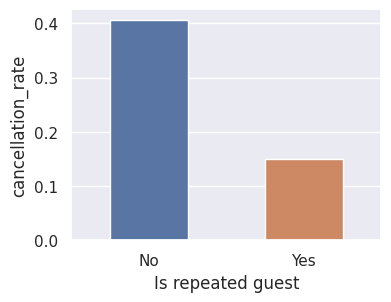

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(data=cancellation_rate_by_guest, x="is_repeated_guest", y = "cancellation_rate", width=0.5)
ax.set(xlabel = "Is repeated guest", xticklabels=["No", "Yes"])
plt.show()

## How Number of Guest Varied by Month?

In [ ]:
no_guest_resort_by_month = resort["arrival_date_month"].value_counts().reset_index()
no_guest_city_by_month = city["arrival_date_month"].value_counts().reset_index()
no_guest_resort_by_month.columns = ["month", "no of guests in resort hotel"]
no_guest_city_by_month.columns = ["month", "no of guests in city hotel"]

In [ ]:
display(no_guest_resort_by_month)
print()
display(no_guest_city_by_month)

,month,no of guests in resort hotel
0,August,2633
1,July,2345
2,March,1983
3,April,1909
4,February,1790
5,December,1713
6,November,1638
7,May,1611
8,January,1576
9,October,1541


,month,no of guests in city hotel
0,August,4650
1,July,4002
2,May,3887
3,October,3858
4,September,3702
5,June,3642
6,March,3548
7,April,3498
8,February,2744
9,November,2418


In [ ]:
no_guest_by_month = no_guest_resort_by_month.merge(no_guest_city_by_month, on="month")
no_guest_by_month = sort_month(no_guest_by_month, "month")
no_guest_by_month

,month,no of guests in resort hotel,no of guests in city hotel
0,January,1576,2022
1,February,1790,2744
2,March,1983,3548
3,April,1909,3498
4,May,1611,3887
5,June,1259,3642
6,July,2345,4002
7,August,2633,4650
8,September,1355,3702
9,October,1541,3858


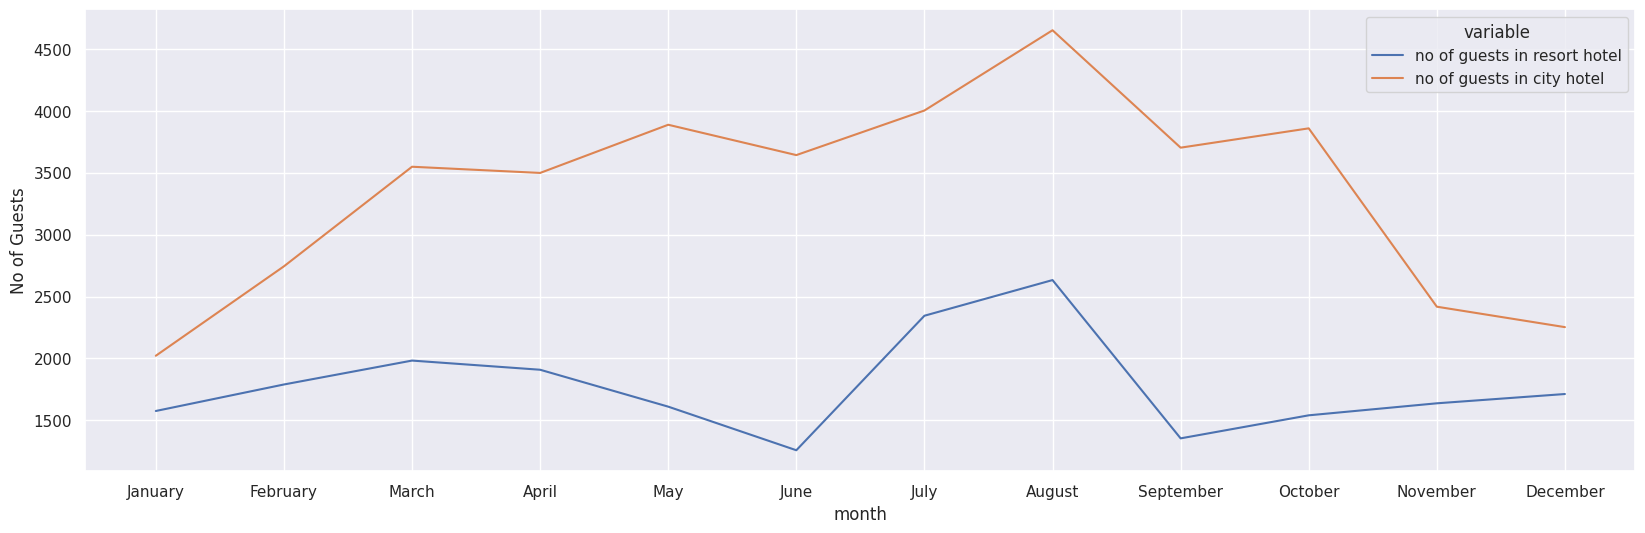

In [ ]:
fig, ax =  plt.subplots(figsize=(20, 6))
sns.lineplot(x='month', y='value', hue='variable', 
             data=pd.melt(no_guest_by_month, ['month']))
ax.set(ylabel="No of Guests")
plt.show()

## Perform Useful Transformation on data

In [ ]:
data['is_canceled'] = data['is_canceled'].astype('int64')

In [ ]:
data['reserved_room_type'] = data['reserved_room_type'].astype('string')
data['assigned_room_type'] = data['assigned_room_type'].astype('string')
data['same_room_type'] = (data['assigned_room_type'] == data['reserved_room_type']).astype(int)


In [ ]:
data = data.rename(columns={"happiness score": "happiness_score"})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102034 entries, 0 to 102033
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102034 non-null  object 
 1   is_canceled                     102034 non-null  int64  
 2   lead_time                       102034 non-null  int64  
 3   arrival_date_year               102034 non-null  int64  
 4   arrival_date_month              102034 non-null  object 
 5   arrival_date_week_number        102034 non-null  int64  
 6   arrival_date_day_of_month       102034 non-null  int64  
 7   stays_in_weekend_nights         102034 non-null  int64  
 8   stays_in_week_nights            102034 non-null  int64  
 9   adults                          102034 non-null  int64  
 10  children                        102030 non-null  float64
 11  babies                          102034 non-null  int64  
 12  meal            

In [ ]:
# drop non-neccessary columns
"""model_data = data.drop(columns=['lead_time', "happiness rank", 'days_in_waiting_list', "arrival_date_year", 
                                "total_gdp_million", "generosity", "dystopia residual", "family", "health (life expectancy)", "trust (government corruption)", 
                                'gdp_variation', 'economy (gdp per capita)', 'freedom', "region_name", "sub_region_name", "income_group", 
                                "reservation_status_date", "reservation_status", "intermediate_region", "reserved_room_type", "assigned_room_type", "country_name", "country"])"""
model_data = data.drop(columns=['lead_time', "happiness rank", 'days_in_waiting_list', "arrival_date_year", 
                                "total_gdp_million", "generosity", "dystopia residual", "family", "health (life expectancy)", "trust (government corruption)", 
                                'economy (gdp per capita)', 'freedom', "region_name", "sub_region_name", "income_group", 
                                "reservation_status_date", "reservation_status", "intermediate_region", "reserved_room_type", "assigned_room_type", "country_name", "country"])
model_data.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'total_gdp',
       'gdp_variation', 'happiness_score', 'same_room_type'],
      dtype='object')

In [ ]:
data.shape

(102034, 50)

In [ ]:
model_data.shape

(102034, 28)

<ipython-input-28-c1ff7e624a5a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = model_data.corr()


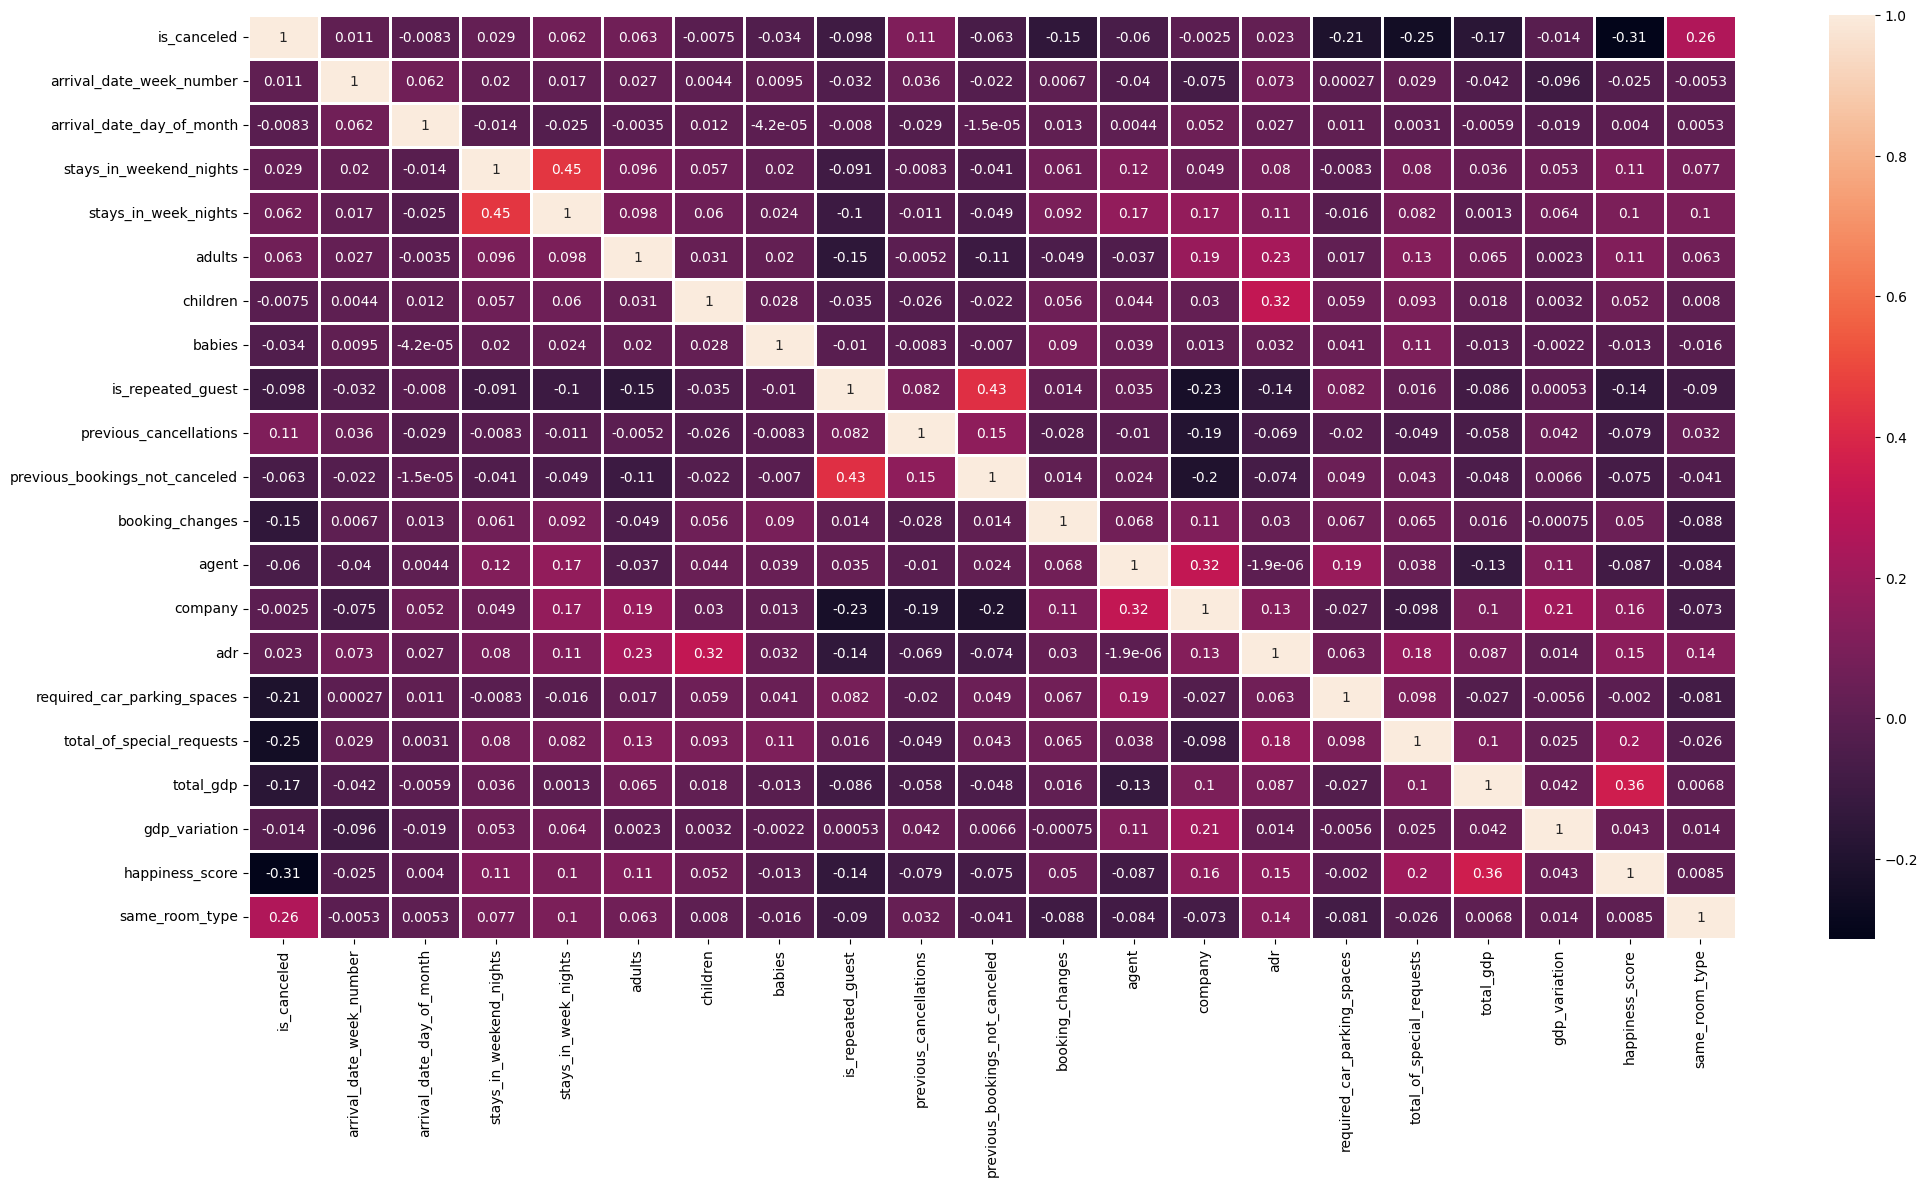

In [ ]:
plt.figure(figsize = (24, 12))

corr = model_data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
# find categorical columns
cate_cols = []
for c in model_data.columns:
  if model_data[c].dtype == 'O' or model_data[c].dtype == 'category' or model_data[c].dtype == 'string':
    cate_cols.append(c)
cate_data_enc = pd.get_dummies(model_data[cate_cols])
cate_data_enc

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
102030,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
102031,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
102032,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
# standardization
num_data = model_data.drop(columns=cate_cols+["is_canceled"], axis=1)
num_data = num_data.fillna(0)
for c in num_data.columns:
  num_data[c] = (num_data[c] - num_data[c].mean() ) / num_data[c].std()
num_data

,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests,total_gdp,gdp_variation,happiness_score,same_room_type
0,-0.016993,-1.685310,-0.911678,-1.337429,0.251665,-0.259464,-0.08461,-0.193185,-0.110102,-0.094681,4.369381,-0.675776,-0.193154,-2.005738,-0.256841,-0.702047,-0.557232,-0.328467,-0.929414,0.377349
1,-0.016993,-1.685310,-0.911678,-1.337429,0.251665,-0.259464,-0.08461,-0.193185,-0.110102,-0.094681,5.935758,-0.675776,-0.193154,-2.005738,-0.256841,-0.702047,-0.557232,-0.328467,-0.929414,0.377349
2,-0.016993,-1.685310,-0.911678,-0.221708,0.251665,-0.259464,-0.08461,-0.193185,-0.110102,-0.094681,-0.329751,-0.675776,-0.193154,0.098508,-0.256841,-0.702047,-0.557232,-0.328467,-0.929414,0.377349
3,-0.016993,-1.685310,-0.911678,-0.221708,0.251665,-0.259464,-0.08461,-0.193185,-0.110102,-0.094681,-0.329751,2.209257,-0.193154,0.019844,-0.256841,0.570902,-0.557232,-0.328467,-0.929414,0.377349
4,-0.016993,-1.685310,-0.911678,0.336152,0.251665,-0.259464,-0.08461,-0.193185,-0.110102,-0.094681,-0.329751,1.609399,-0.193154,-0.393138,-0.256841,0.570902,-0.557232,-0.328467,-0.929414,0.377349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,-0.016993,-1.003081,-0.911678,-0.779569,0.251665,7.345875,-0.08461,-0.193185,-0.110102,-0.094681,-0.329751,-0.542474,-0.193154,2.944157,-0.256841,-0.702047,-0.681695,2.388230,-1.784935,0.377349
102030,0.128362,0.020263,1.169843,-0.779569,0.251665,-0.259464,-0.08461,-0.193185,-0.110102,-0.094681,2.803004,-0.590082,-0.193154,0.100474,-0.256841,0.570902,-0.684339,2.197800,-1.001297,0.377349
102031,0.128362,0.020263,1.169843,-0.779569,0.251665,2.275649,-0.08461,-0.193185,-0.110102,-0.094681,-0.329751,-0.590082,-0.193154,1.337457,-0.256841,3.116802,-0.644839,14.283063,-0.430949,0.377349
102032,0.201040,1.271016,1.169843,1.451873,0.251665,-0.259464,-0.08461,-0.193185,-0.110102,-0.094681,-0.329751,-0.590082,-0.193154,0.382286,-0.256841,0.570902,-0.686868,0.814080,-1.392526,0.377349


In [ ]:
X = pd.concat([cate_data_enc, num_data], axis=1)
y = model_data["is_canceled"]

# Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
print("Train data length: ", X_train.shape[0])
print("Test data length: ", X_test.shape[0])

Train data length:  71423
Test data length:  30611


## Baseline Model

In [ ]:
cancel_false = len(y_train) - sum(y_train)
cancel_true = sum(y_train)

cm_baseline = confusion_matrix(y_test, [0]*y_test.shape[0])

tn_bl, fp_bl, fn_bl, tp_bl = cm_baseline.ravel()
TPR_bl = tp_bl / (tp_bl + fn_bl)
FPR_bl = fp_bl / (fp_bl + tn_bl)

In [ ]:
ACC = cancel_false /(cancel_false  + cancel_true) 
ACC

0.603601080884309

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
log_y_pred = logreg.predict(X_test)
logregacc = logreg.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
logconf_matrix = metrics.confusion_matrix(y_test, log_y_pred)
logy_pred_proba = logreg.predict_proba(X_test)[::,1]
logfpr, logtpr, _ = metrics.roc_curve(y_test,  logy_pred_proba)
logauc = metrics.roc_auc_score(y_test, logy_pred_proba)

In [ ]:
acc_log = accuracy_score(y_test, log_y_pred)
conf = confusion_matrix(y_test,log_y_pred)
log_report = classification_report(y_test, log_y_pred)

TPR_lg = conf.ravel()[3]/(conf.ravel()[3]+conf.ravel()[2])
FPR_lg = conf.ravel()[1]/(conf.ravel()[1]+conf.ravel()[0])

print(f"Accuracy Score of Logistic Regression is : {acc_log}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{log_report}")

Accuracy Score of Logistic Regression is : 0.8040900329946751
Confusion Matrix : 
[[16646  1820]
 [ 4177  7968]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     18466
           1       0.81      0.66      0.73     12145

    accuracy                           0.80     30611
   macro avg       0.81      0.78      0.79     30611
weighted avg       0.81      0.80      0.80     30611



## Random Forest

### Fine-Tuned to get optimal paramters: min_samples_leaf = 5, n_estimators=100,random_state=88

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=88)
cv=KFold(n_splits=10, shuffle = True, random_state=88)
rfc_score=cvs(rfc, X_train,y_train,cv=cv).mean()
rfc.fit(X_train,y_train)
rfc_y_score=rfc.predict_proba(X_test)[:,1]
rfc_pred=rfc.predict(X_test)
rfc_FPR, rfc_recall, thresholds = roc_curve(y_test, rfc_y_score, pos_label=1)
rfc_auc = AUC(y_test,rfc_y_score)

In [ ]:
acc_clf = accuracy_score(y_test, rfc_pred)
rfc_conf = confusion_matrix(y_test, rfc_pred)
clf_report = classification_report(y_test, rfc_pred)

TPR_rfc = rfc_conf.ravel()[3]/(rfc_conf.ravel()[3]+rfc_conf.ravel()[2])
FPR_rfc = rfc_conf.ravel()[1]/(rfc_conf.ravel()[1]+rfc_conf.ravel()[0])

print(f"Accuracy Score of Random Forest is : {acc_clf}")
print(f"Confusion Matrix : \n{rfc_conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8818071934925353
Confusion Matrix : 
[[17075  1391]
 [ 2227  9918]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18466
           1       0.88      0.82      0.85     12145

    accuracy                           0.88     30611
   macro avg       0.88      0.87      0.87     30611
weighted avg       0.88      0.88      0.88     30611



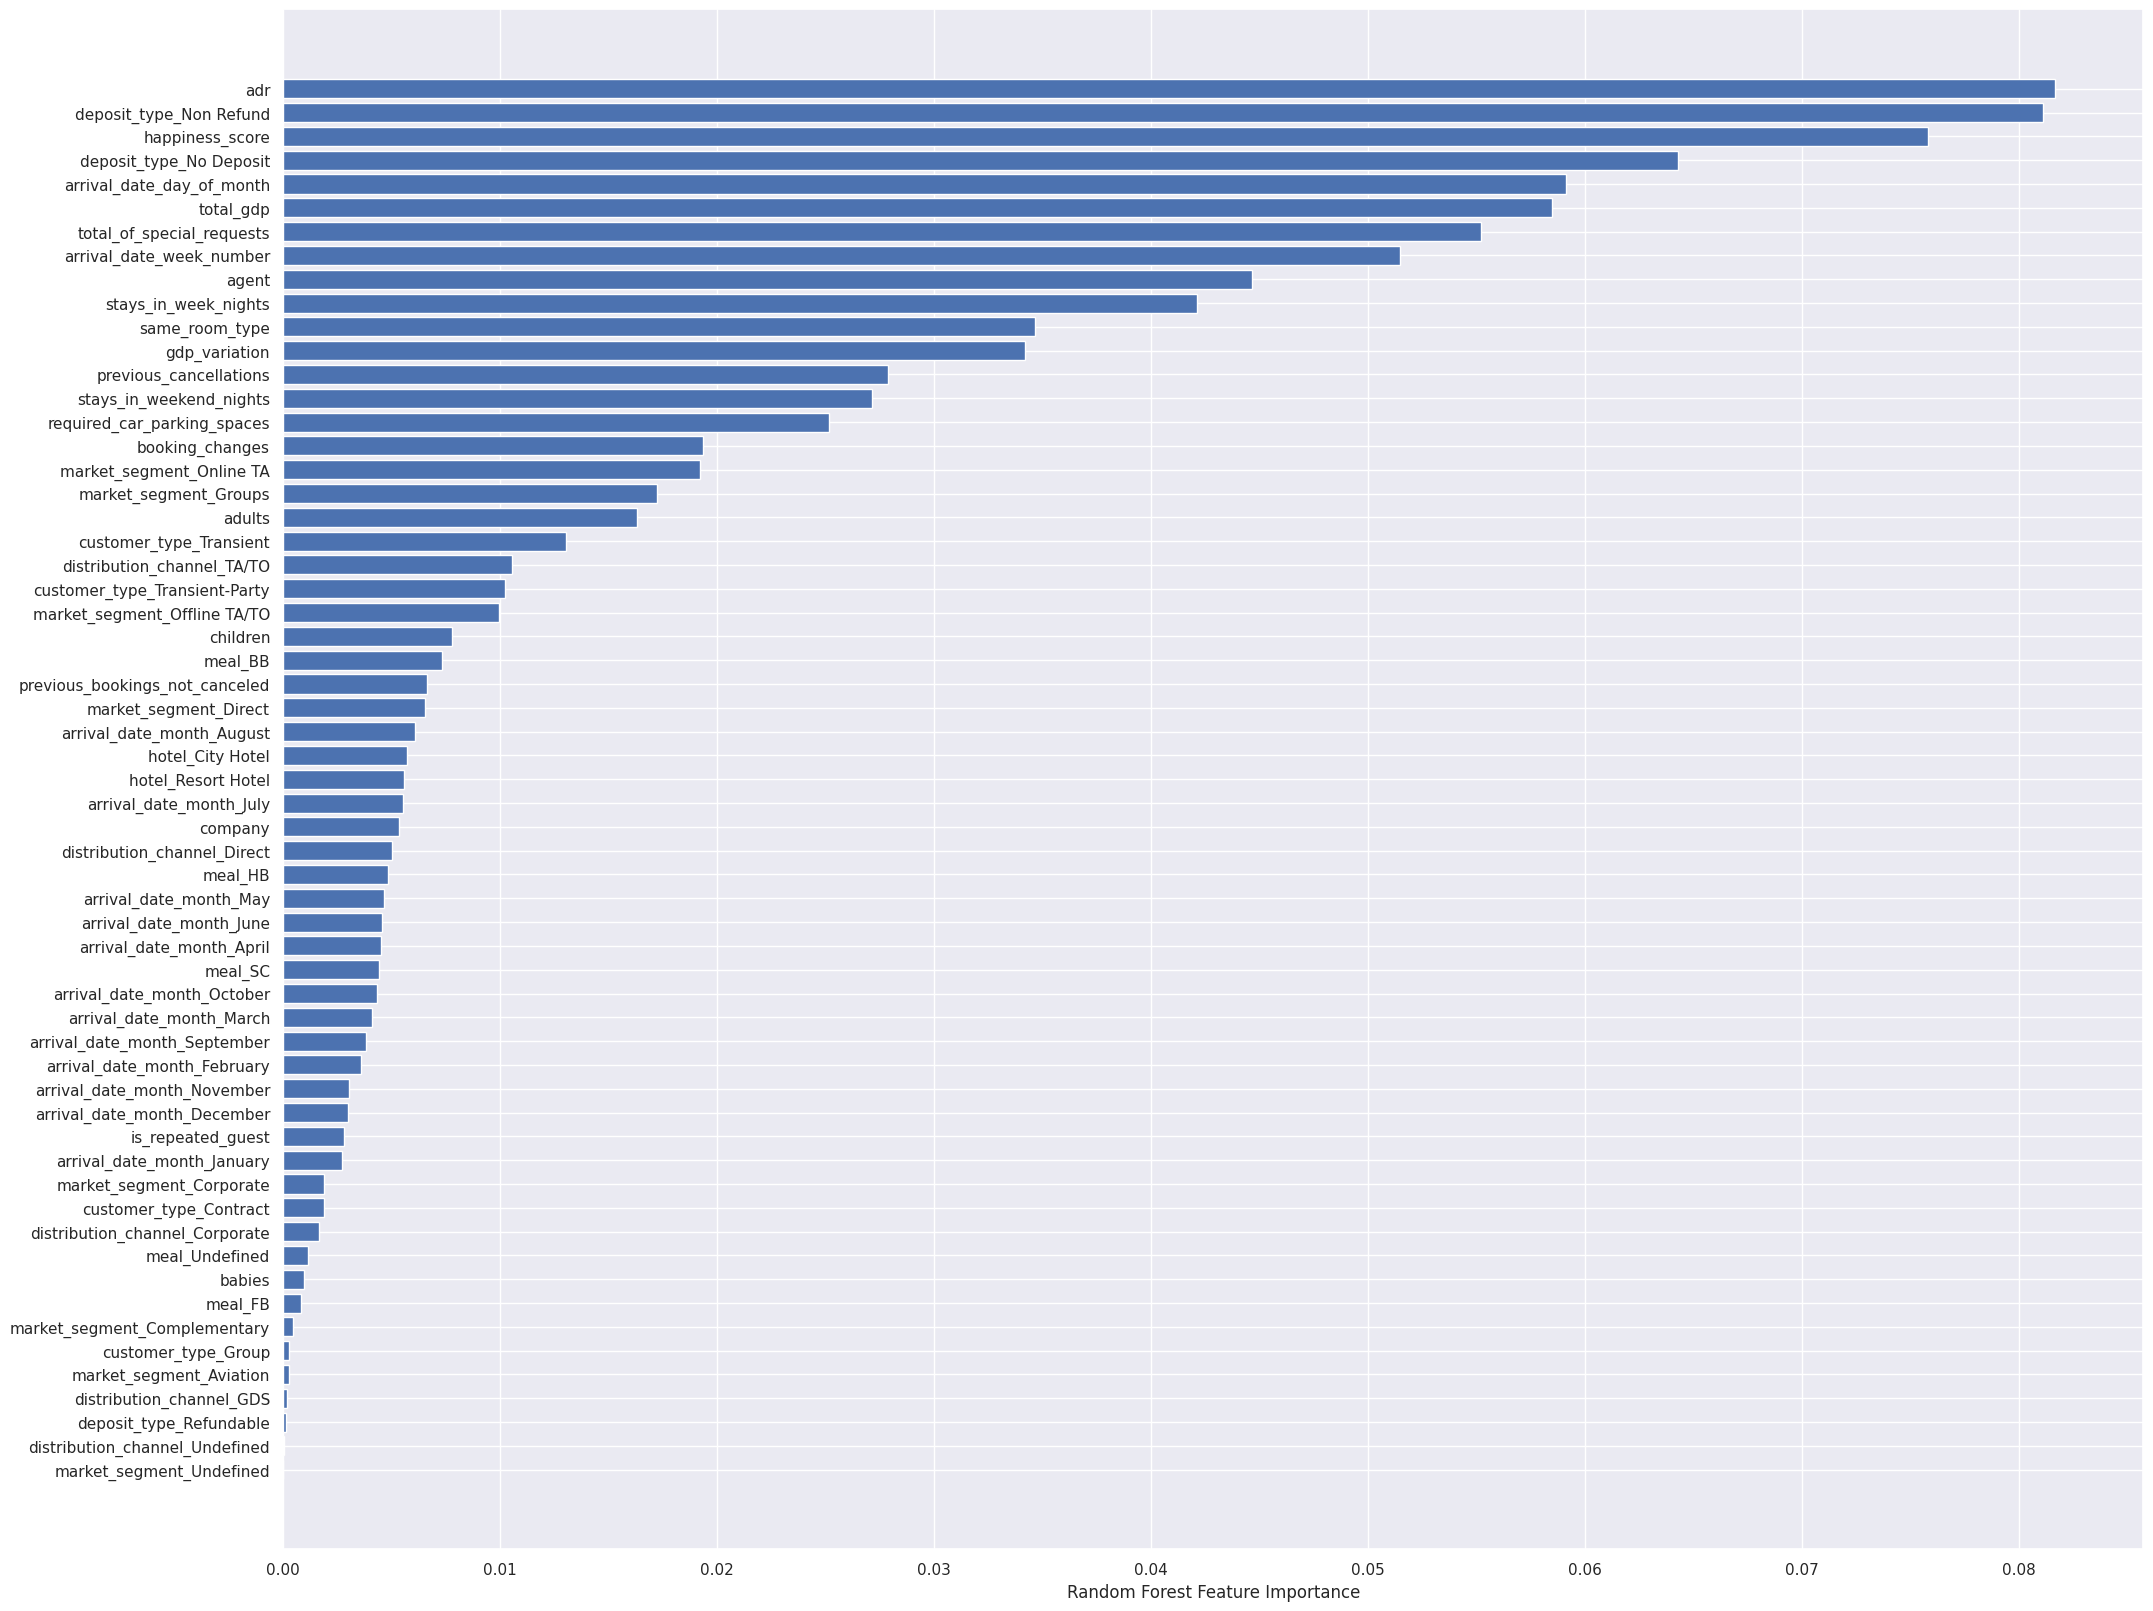

In [ ]:
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize = (24, 20))
plt.barh(X.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

### Xgboost

In [35]:
xgbr=XGBClassifier(n_estimators=100,random_state=90)
cv=KFold(n_splits=10, shuffle = True, random_state=90)
xgbr_score=cvs(xgbr,X_train,y_train,cv=cv).mean()
xgbr.fit(X_train,y_train)
xgbr_y_score=xgbr.predict_proba(X_test)[:,1]
xgbr_pred= xgbr.predict(X_test)
xgbr_FPR, xgbr_recall, thresholds = roc_curve(y_test, xgbr_y_score, pos_label=1)
xgbr_auc = AUC(y_test,xgbr_y_score)

In [ ]:
acc_xgbr = accuracy_score(y_test, xgbr_pred)
xgbr_conf = confusion_matrix(y_test, xgbr_pred)
clf_report = classification_report(y_test, xgbr_pred)

TPR_xgbr = xgbr_conf.ravel()[3]/(xgbr_conf.ravel()[3]+xgbr_conf.ravel()[2])
FPR_xgbr = xgbr_conf.ravel()[1]/(xgbr_conf.ravel()[1]+xgbr_conf.ravel()[0])

print(f"Accuracy Score of XGBoost is : {acc_xgbr}")
print(f"Confusion Matrix : \n{xgbr_conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost is : 0.86498317598249
Confusion Matrix : 
[[16781  1685]
 [ 2448  9697]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     18466
           1       0.85      0.80      0.82     12145

    accuracy                           0.86     30611
   macro avg       0.86      0.85      0.86     30611
weighted avg       0.86      0.86      0.86     30611



scale_weight = 1.5

In [ ]:
xgbr=XGBClassifier(n_estimators=100,random_state=90)
cv=KFold(n_splits=10, shuffle = True, random_state=90)
xgbr_score=cvs(xgbr,X_train,y_train,cv=cv).mean()
xgbr.fit(X_train,y_train)
xgbr_y_score=xgbr.predict_proba(X_test)[:,1]
xgbr_pred= xgbr.predict(X_test)
xgbr_FPR, xgbr_recall, thresholds = roc_curve(y_test, xgbr_y_score, pos_label=1)
xgbr_auc = AUC(y_test,xgbr_y_score)

## Neural Network

In [ ]:
X.shape

(102034, 59)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],)))
model.add(Activation('relu'))

model.add(Dense(84))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
# Print a summary of the Keras model:
print(model.summary())
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, callbacks=[es], verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6000      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 84)                8484      
                                                                 
 activation_1 (Activation)   (None, 84)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                5440      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (acc*100))

957/957 [==============================] - 2s 2ms/step - loss: 0.3288 - accuracy: 0.8442
Accuracy: 84.42


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


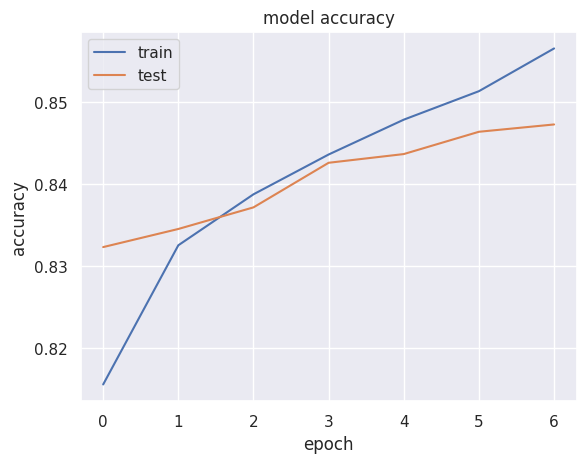

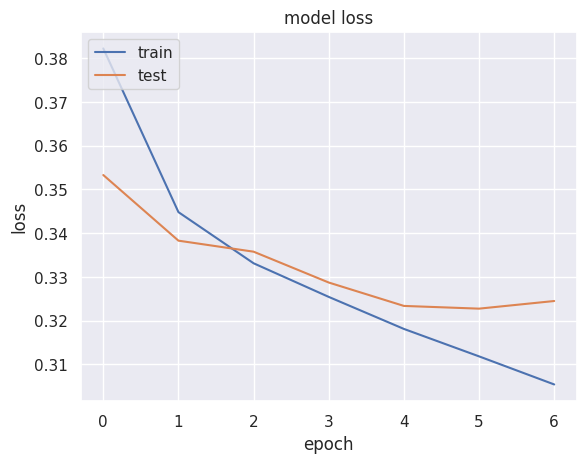

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred_nn = model.predict(X_test)
y_pred_nn = np.where(y_pred_nn > 0.5, 1,0)

957/957 [==============================] - 2s 2ms/step


In [ ]:
y_pred_nn

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
nn_conf = confusion_matrix(y_test,y_pred_nn)
TPR_nn = nn_conf.ravel()[3]/(nn_conf.ravel()[3]+nn_conf.ravel()[2])
FPR_nn = nn_conf.ravel()[1]/(nn_conf.ravel()[1]+nn_conf.ravel()[0])

nn_y_score=model.predict(X_test)
nn_fpr, nn_recall, thresholds = roc_curve(y_test, nn_y_score, pos_label=1)
nn_auc = AUC(y_test, nn_y_score)

957/957 [==============================] - 2s 2ms/step


# Result

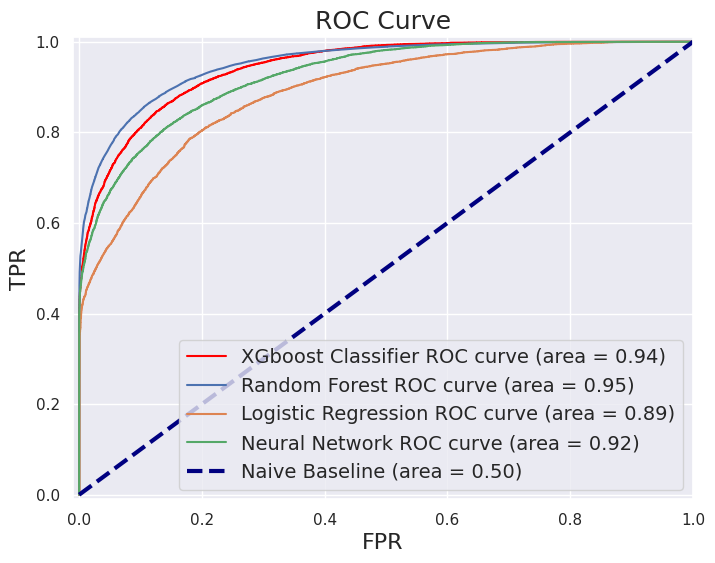

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

plt.plot(xgbr_FPR, xgbr_recall, color='red',label='XGboost Classifier ROC curve (area = %0.2f)' % xgbr_auc)
plt.plot(rfc_FPR, rfc_recall,label='Random Forest ROC curve (area = %0.2f)' % rfc_auc)
plt.plot(logfpr,logtpr,label="Logistic Regression ROC curve (area = %0.2f)" % logauc)
plt.plot(nn_fpr,nn_recall,label="Neural Network ROC curve (area = %0.2f)" % nn_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')

plt.legend(loc='lower right', fontsize=14)
plt.show()

In [ ]:
eval_table = pd.DataFrame({"Accuracy": [ACC, logregacc, acc_clf, acc_xgbr, acc], \
                           "TPR": [TPR_bl, TPR_lg, TPR_rfc,TPR_xgbr, TPR_nn], \
                           "FPR": [FPR_bl, FPR_lg, FPR_rfc, FPR_xgbr, FPR_nn]}, \
                          index=["Baseline Model", "Logistic Regression", "Random Forest", "XGBoost", "Neural Network"])
eval_table

,Accuracy,TPR,FPR
Baseline Model,0.603601,0.000000,0.000000
Logistic Regression,0.804090,0.656072,0.098560
Random Forest,0.881807,0.816632,0.075328
XGBoost,0.864983,0.798436,0.091249
Neural Network,0.844239,0.749856,0.093686
